In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
import scipy.stats.powerlaw

ImportError: DLL load failed: The specified procedure could not be found.

In [37]:
df = pd.read_csv('amazon.graph.small.csv')
df = df.drop(df.columns[0],axis=1)
x = np.array(df[df.columns[0]].to_list())
y = np.array(df[df.columns[1]].to_list())
x_new = np.linspace(x[0],x[-1], 100)

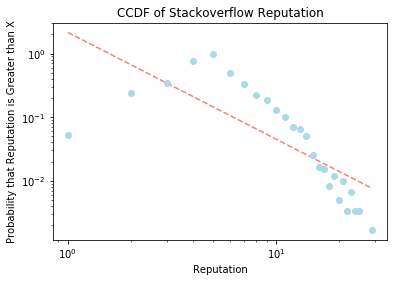

In [54]:
ccdf = y.astype(float) / y.max()

# Fit a line in log-space
logx = np.log(x)
logy = np.log(ccdf)
params = np.polyfit(logx, logy, 1)
est = np.exp(np.polyval(params, logx))

fig, ax = plt.subplots()
ax.loglog(x, ccdf, color='lightblue', ls='', marker='o',
          clip_on=False, zorder=10, label='Observations')

ax.plot(x, est, color='salmon', label='Fit', ls='--')

ax.set(xlabel='Reputation', title='CCDF of Stackoverflow Reputation',
       ylabel='Probability that Reputation is Greater than X')

plt.show()

In [56]:
params[0]

-1.6783530865977718

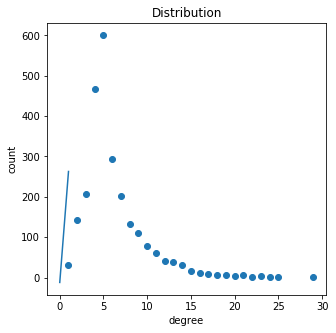

In [59]:
params = np.polyfit(x,y,1)
f, ax = plt.subplots(figsize=(5, 5))
#ax.set(xscale="log", yscale="log")
ax.scatter(x, y)

ax.set_title('Distribution')
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.plot(params)